In [56]:
import pandas as pd, cufflinks as cf,plotly.express as px,numpy as np

In [55]:
from IPython.display import display,HTML
cf.set_config_file(sharing='plubic',theme='ggplot',offline=True)

In [101]:
game = pd.read_excel('/Users/Hydral/Documents/Enviromen/video_games\Ventas+Videojuegos.xlsx')
game = game.convert_dtypes()


Renombrando columnas

In [102]:
game = game.rename(columns={'Ventas NA':'Norte America','Ventas EU':'Europa','Ventas JP':'Japon','Ventas Otros':'Otros','Ventas Global':'Total Ventas'})

In [103]:
#Asignando valores

#formato categoria
game[['Plataforma','Genero','Editorial']] = game[['Plataforma','Genero','Editorial']].astype('category')

#
game['Nombre'] = game['Nombre'].astype('string')


game.convert_dtypes()

,Nombre,Plataforma,Año,Genero,Editorial,Norte America,Europa,Japon,Otros,Total Ventas
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.0,0.01,0.0,0.0,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.0,0.01,0.0,0.0,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,PSV,2016,Action,dramatic create,0.0,0.0,0.01,0.0,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01


Medidas Ventas

In [124]:
#Pormedio ventas
sales_avg_genere = game.groupby(['Año'])[['Norte America','Europa','Japon']].agg('mean')

#promedio ventas por continente
sales_by_zone = game.iloc[:,[5,6,7,8]].sum()

#promedios ventas por Editorial
sales_max_platform = game.groupby(['Plataforma'])[['Norte America','Europa','Japon']].agg('max')

#ventas por año,region
sales_by_year =game.groupby(['Año'])[['Norte America','Europa','Japon']].agg('sum')

#ventas por platafroma y region
sales_by_platform  = game.groupby(['Plataforma'])[['Norte America','Europa','Japon']].agg('sum')

#Total ventas
sales_total = game.iloc[:,9].sum()
sales_NA = game.iloc[:,5].sum()
sales_EU = game.iloc[:,6].sum()
sales_JP = game.iloc[:,7].sum()

#Ratios
#sales_ratio_NA = sales_NA/sales_total
#sales_ratio_NA = sales_ratio_NA.style.format("{:.2f}")
#sales_ratio_NA.style.format("{:.1%}")

#sales_ratio_EU = sales_EU/sales_total
#sales_ratio_EU.style.format("{:.2f}")

#sales_ratio_JP = sales_JP/sales_total
#sales_ratio_EU.style.format("{:.2f}")




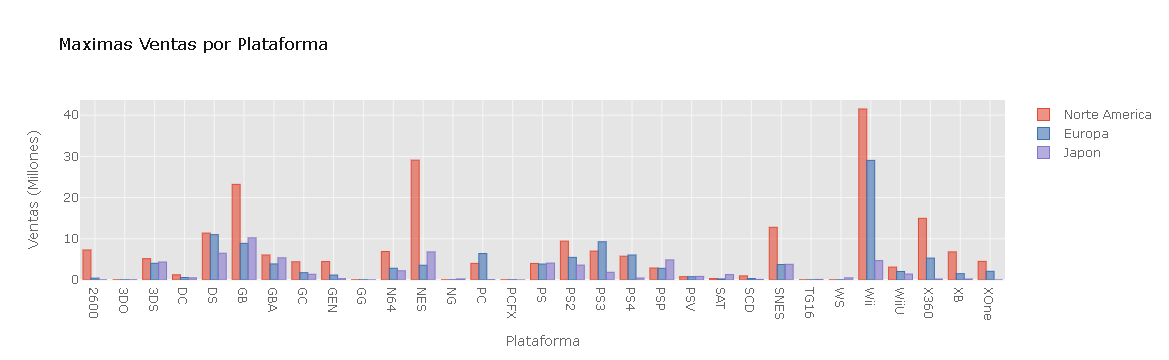

In [123]:
#mayores Ventas por plataforma
sales_max_platform.iplot(kind='bar',xTitle='Plataforma',yTitle='Ventas (Millones)',title='Maximas Ventas por Plataforma ')


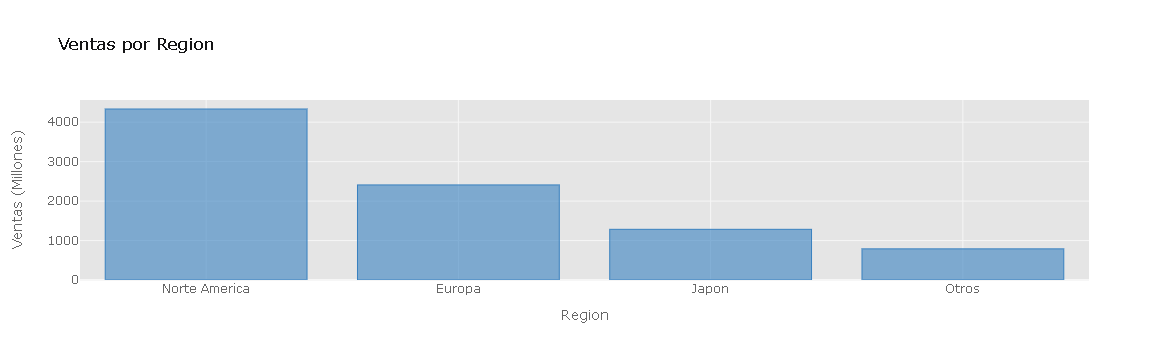

In [129]:
# Promedio Ventas por Region 
sales_by_zone.iplot(kind='bar',xTitle='Region',yTitle='Ventas (Millones)',title='Ventas por Region ',color='blue')

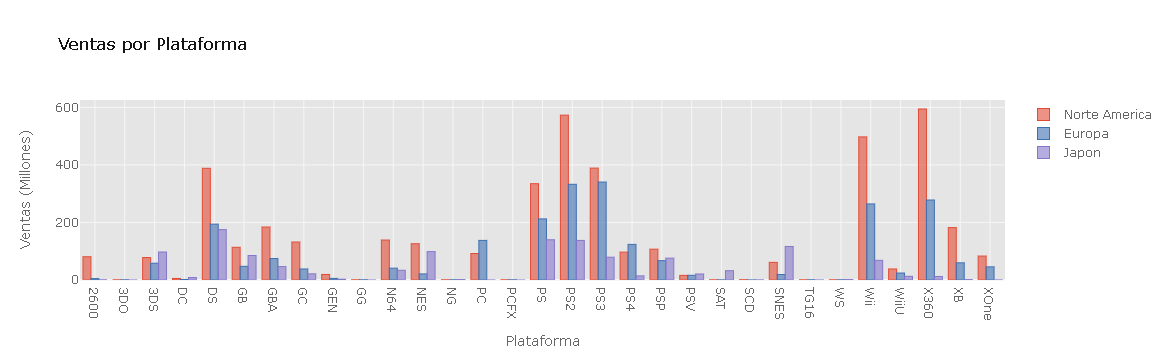

In [106]:
#Ventas por Plataforma
sales_by_platform.iplot(kind='bar',xTitle='Plataforma',yTitle='Ventas (Millones)',title='Ventas por Plataforma ')

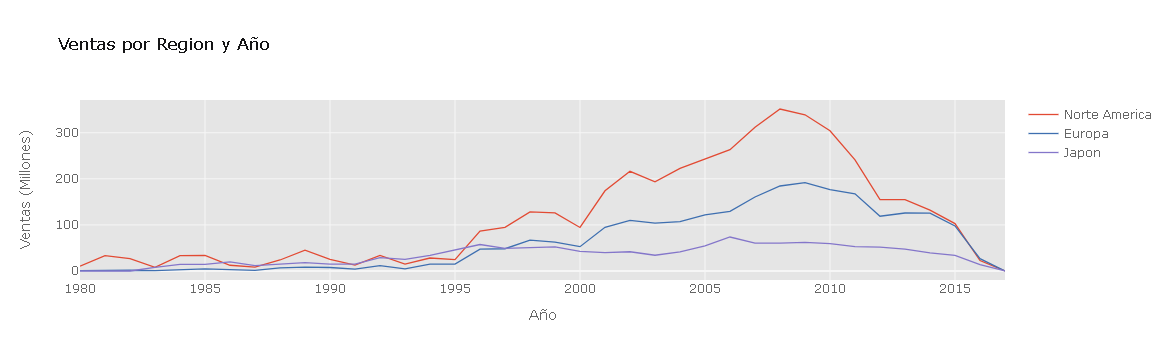

In [107]:
#Ventas por años,region
sales_by_year.iplot(kind='line',xTitle='Año',yTitle='Ventas (Millones)',title='Ventas por Region y Año')
